# Simple MNIST NN from scratch

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# data = pd.read_csv('/Users/nishagi/myStuff/Datasets/mnist/train.csv')
data = pd.read_csv('path/to/your/mnist/dataset.csv')

In [46]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [47]:
Y_train

array([9, 5, 7, ..., 1, 7, 0])

In [48]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01  # Wider hidden layer (128 units)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * 0.01   # Updated for new shape
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [49]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [50]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 6 ... 9 5 0] [9 5 7 ... 1 7 0]
0.08314634146341464
Iteration:  10
[9 9 9 ... 1 9 0] [9 5 7 ... 1 7 0]
0.2724878048780488
Iteration:  20
[9 3 9 ... 1 9 0] [9 5 7 ... 1 7 0]
0.3261951219512195
Iteration:  30
[9 3 9 ... 1 9 0] [9 5 7 ... 1 7 0]
0.40868292682926827
Iteration:  40
[9 3 1 ... 1 7 0] [9 5 7 ... 1 7 0]
0.51
Iteration:  50
[9 3 1 ... 1 7 0] [9 5 7 ... 1 7 0]
0.5783414634146341
Iteration:  60
[9 3 1 ... 1 7 0] [9 5 7 ... 1 7 0]
0.638390243902439
Iteration:  70
[9 3 1 ... 1 7 0] [9 5 7 ... 1 7 0]
0.6973658536585365
Iteration:  80
[4 3 1 ... 1 7 0] [9 5 7 ... 1 7 0]
0.743609756097561
Iteration:  90
[4 3 7 ... 1 7 0] [9 5 7 ... 1 7 0]
0.7763658536585366
Iteration:  100
[4 3 7 ... 1 7 0] [9 5 7 ... 1 7 0]
0.7967804878048781
Iteration:  110
[4 3 7 ... 1 7 0] [9 5 7 ... 1 7 0]
0.813170731707317
Iteration:  120
[4 3 7 ... 1 7 0] [9 5 7 ... 1 7 0]
0.8266097560975609
Iteration:  130
[9 3 7 ... 1 7 0] [9 5 7 ... 1 7 0]
0.8369512195121951
Iteration:  140
[9 3 7 ... 1 7 0

~90% accuracy on training set.

In [51]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [9]
Label:  9


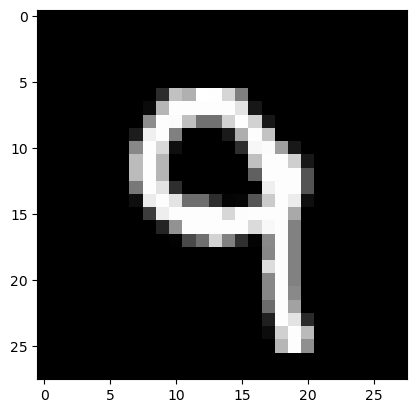

Prediction:  [5]
Label:  5


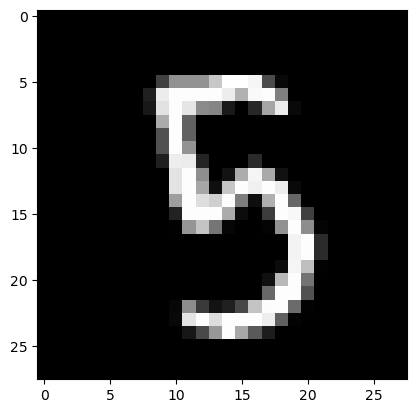

Prediction:  [7]
Label:  7


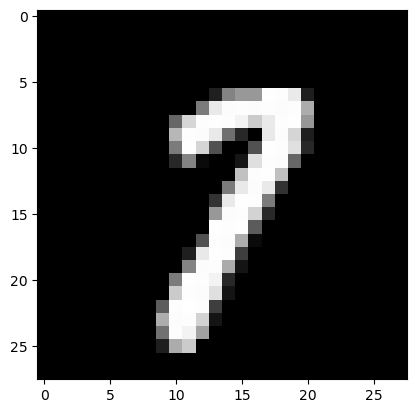

Prediction:  [2]
Label:  2


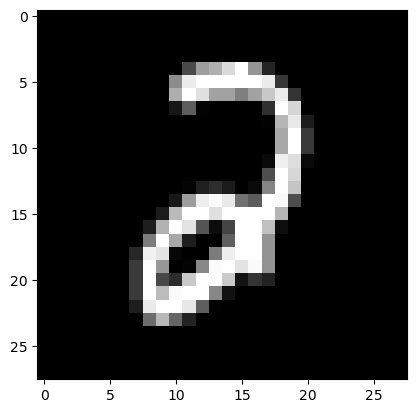

In [52]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [53]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 1 5 3 8 5 6 1 6 9 3 4 3 5 0 9 0 7 9 5 3 8 8 2 2 0 6 4 2 1 0 5 9 7 4 1 3
 8 8 9 2 1 8 0 9 0 0 2 3 9 6 6 6 1 4 3 9 1 6 5 4 6 1 0 1 8 1 8 5 5 6 2 0 8
 9 9 7 6 5 3 7 3 2 4 1 2 3 6 8 6 8 0 7 7 1 4 4 1 2 2 3 0 2 7 2 5 4 3 9 5 0
 2 7 4 8 9 5 2 7 1 8 7 6 1 2 6 6 0 6 1 6 0 6 2 1 2 8 0 3 0 2 2 0 7 8 0 4 6
 6 0 3 5 5 6 6 2 6 3 0 8 2 8 5 5 0 4 1 3 1 5 7 9 1 2 7 7 0 8 5 1 2 9 1 7 0
 1 2 9 0 3 2 9 5 0 8 6 8 1 1 4 1 9 4 7 2 1 0 4 6 0 8 3 1 2 6 1 4 0 8 1 0 7
 2 4 6 4 5 6 1 1 6 9 6 3 0 0 4 0 0 1 9 0 4 7 1 0 6 1 0 9 6 9 8 4 5 6 2 0 8
 0 7 7 7 9 9 1 2 7 8 1 4 9 6 7 3 4 6 6 7 6 3 0 4 9 5 5 4 5 5 4 2 9 5 6 1 9
 2 8 0 2 1 0 8 3 9 9 1 0 5 3 2 1 1 1 1 6 4 6 5 8 0 9 9 3 1 6 0 6 6 3 5 9 9
 7 6 9 4 2 4 9 6 8 1 9 8 2 7 9 3 7 1 1 9 6 1 7 3 0 4 9 1 0 9 6 5 9 5 7 0 3
 7 1 3 0 5 8 3 3 4 2 3 8 6 5 8 7 9 2 6 5 2 4 0 2 5 9 9 1 1 4 9 4 9 7 3 3 3
 0 8 3 5 8 9 0 0 1 6 3 8 4 4 7 1 9 4 7 5 5 3 5 7 9 8 9 3 0 4 9 7 5 2 0 7 8
 9 6 0 0 3 9 0 4 9 1 4 8 4 9 2 2 0 0 4 5 5 3 5 0 4 6 3 4 6 2 5 5 5 5 3 8 5
 8 6 3 5 4 4 8 5 6 0 6 4 

np.float64(0.889)

Prediction:  [5]
Label:  5


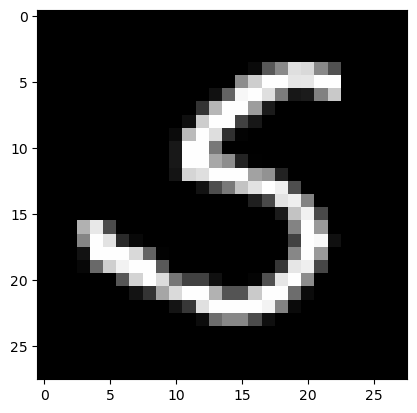

In [54]:
test_prediction(106, W1, b1, W2, b2)